In [9]:
import json

In [32]:
K=2

In [33]:
cluster_dataset = json.load(open('clusters/cluster_mnli_k{}.json'.format(K)))

In [34]:
len(cluster_dataset)

412349

In [35]:
print(type(cluster_dataset))
print(cluster_dataset['train-0'])

<class 'dict'>
0


#### Train

In [36]:
train_labels, test_labels = {}, {}

for k, v in cluster_dataset.items():
    if 'train' in k:
        if v not in train_labels:
            train_labels[v] = 1
        train_labels[v] += 1
    elif 'dev' in k:
        if v not in test_labels:
            test_labels[v] = 1
        test_labels[v] += 1
    else:
        raise Exception('Something wrong! {}'.format(k))

In [38]:
test_labels

{0: 19214, 1: 435}

In [37]:
max([n for l, n in test_labels.items()]) / sum([n for l, n in test_labels.items()])

0.977861468777037

In [25]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

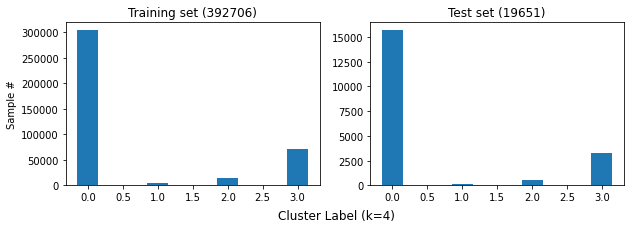

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10.0, 3.0))
fig.subplots_adjust(hspace=1.)

classes = [(l, n) for l, n in train_labels.items()]
ax1.bar([c[0] for c in classes], [c[1] for c in classes], width=0.3)

# ax1.set_xlabel('Label')
ax1.set_ylabel('Sample #')
ax1.set_title('Training set ({})'.format(sum([c[1] for c in classes])))

classes = [(l, n) for l, n in test_labels.items()]
ax2.bar([c[0] for c in classes], [c[1] for c in classes], width=0.3)

# ax2.set_xlabel('Label')
# ax2.set_ylabel('Sample #')
ax2.set_title('Test set ({})'.format(sum([c[1] for c in classes])))

fig.text(0.5, -0.03, 'Cluster Label (k={})'.format(len(train_labels)), ha='center', fontsize=12)

plt.savefig("figures/" + 'class_balance_k{}'.format(len(train_labels)) +'.png', bbox_inches="tight")
plt.show()